In [1]:
from skyfield.api import load
from skyfield.framelib import ecliptic_frame
from skyfield.searchlib import find_maxima

In [2]:
ts = load.timescale()
t0 = ts.utc(2019)
t1 = ts.utc(2022)

eph = load('de421.bsp')
sun, earth, venus, mars = eph['sun'], eph['earth'], eph['venus'], eph['mars']

In [3]:
def elongation_at(t):
    e = earth.at(t)
    s = e.observe(sun).apparent()
    v = e.observe(venus).apparent()
    return s.separation_from(v).degrees

In [4]:

elongation_at.step_days = 15.0

times, elongations = find_maxima(t0, t1, elongation_at)



In [5]:
for t, elongation_degrees in zip(times, elongations):
    e = earth.at(t)
    _, slon, _ = e.observe(sun).apparent().frame_latlon(ecliptic_frame)
    _, vlon, _ = e.observe(venus).apparent().frame_latlon(ecliptic_frame)
    is_east = (vlon.degrees - slon.degrees) % 360.0 < 180.0
    direction = 'east' if is_east else 'west'
    print('{}  {:4.1f}° {} elongation'.format(
        t.utc_strftime(), elongation_degrees, direction))

2019-01-06 04:53:35 UTC  47.0° west elongation
2020-03-24 22:13:32 UTC  46.1° east elongation
2020-08-13 00:14:12 UTC  45.8° west elongation
2021-10-29 20:51:56 UTC  47.0° east elongation


In [6]:
eph


<SpiceKernel 'de421.bsp'>

In [14]:
def mars_elongation_degrees(t):
    e = earth.at(t)
    s = e.observe(sun).apparent()
    m = e.observe(venus).apparent()
    return s.separation_from(m).degrees

t = ts.utc(2021, 10, range(29, 29+7))

for ti, ei in zip(t, mars_elongation_degrees(t)):
    print('%s %.4f' % (ti.utc_strftime('%b %d'), ei))

Oct 29 47.0425
Oct 30 47.0450
Oct 31 47.0406
Nov 01 47.0290
Nov 02 47.0100
Nov 03 46.9834
Nov 04 46.9489


In [25]:
mercury = eph['mercury']
def mars_elongation_degrees(t):
    e = earth.at(t)
    s = e.observe(sun).apparent()
    m = e.observe(mars).apparent()
    return s.separation_from(m).degrees

c:\python3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


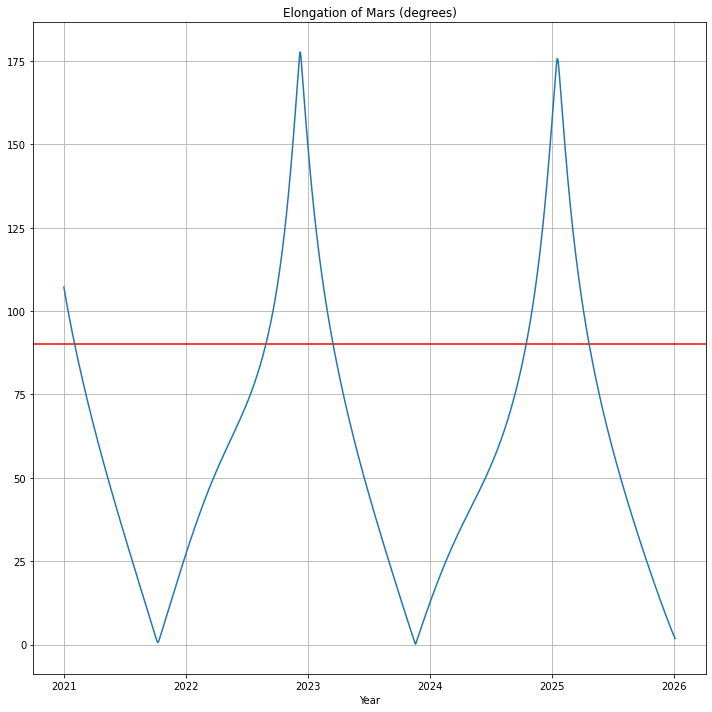

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))

t = ts.utc(2021, 1, range(366 * 5))
ax.axhline(90, color='r')  # Red line at 90°
mmm=mars_elongation_degrees(t)
ax.plot(t.J, mmm)
ax.set(title='Elongation of Mars (degrees)', xlabel='Year')
ax.grid(True)

fig.tight_layout()
#fig.savefig('mars-elongation.png')
fig.show();

In [46]:
times=[]
for i,j in zip(t,mmm):
    if j>=90:
        times.append([i,j])

In [49]:
times

[[<Time tt=2458202.500800741>, 90.14054452628612],
 [<Time tt=2458203.500800741>, 90.5698637600172],
 [<Time tt=2458204.500800741>, 91.00017881030743],
 [<Time tt=2458205.500800741>, 91.43151815912915],
 [<Time tt=2458206.500800741>, 91.8639179282007],
 [<Time tt=2458207.500800741>, 92.29742220540325],
 [<Time tt=2458208.500800741>, 92.7320827076292],
 [<Time tt=2458209.500800741>, 93.16795780266675],
 [<Time tt=2458210.500800741>, 93.60511107560376],
 [<Time tt=2458211.500800741>, 94.04360973376828],
 [<Time tt=2458212.500800741>, 94.48352314597386],
 [<Time tt=2458213.500800741>, 94.92492171733669],
 [<Time tt=2458214.500800741>, 95.36787616742535],
 [<Time tt=2458215.500800741>, 95.81245716542688],
 [<Time tt=2458216.500800741>, 96.25873520960069],
 [<Time tt=2458217.500800741>, 96.70678061693427],
 [<Time tt=2458218.500800741>, 97.15666349587231],
 [<Time tt=2458219.500800741>, 97.60845359514957],
 [<Time tt=2458220.500800741>, 98.06221994898205],
 [<Time tt=2458221.500800741>, 98.

In [35]:
times

[[2018.2272438076407, 90.14054452628612],
 [2018.229981658428, 90.5698637600172],
 [2018.232719509215, 91.00017881030743],
 [2018.235457360002, 91.43151815912915],
 [2018.2381952107894, 91.8639179282007],
 [2018.2409330615765, 92.29742220540325],
 [2018.2436709123635, 92.7320827076292],
 [2018.2464087631506, 93.16795780266675],
 [2018.249146613938, 93.60511107560376],
 [2018.251884464725, 94.04360973376828],
 [2018.254622315512, 94.48352314597386],
 [2018.2573601662991, 94.92492171733669],
 [2018.2600980170864, 95.36787616742535],
 [2018.2628358678735, 95.81245716542688],
 [2018.2655737186606, 96.25873520960069],
 [2018.2683115694476, 96.70678061693427],
 [2018.271049420235, 97.15666349587231],
 [2018.273787271022, 97.60845359514957],
 [2018.276525121809, 98.06221994898205],
 [2018.2792629725964, 98.51803027625812],
 [2018.2820008233834, 98.97595014712645],
 [2018.2847386741705, 99.4360420100212],
 [2018.2874765249576, 99.89836426756447],
 [2018.2902143757449, 100.36297066991315],
 [20

In [56]:
t.utc_jpl()

['A.D. 2020-Dec-31 00:00:00.0000 UTC',
 'A.D. 2021-Jan-01 00:00:00.0000 UTC',
 'A.D. 2021-Jan-02 00:00:00.0000 UTC',
 'A.D. 2021-Jan-03 00:00:00.0000 UTC',
 'A.D. 2021-Jan-04 00:00:00.0000 UTC',
 'A.D. 2021-Jan-05 00:00:00.0000 UTC',
 'A.D. 2021-Jan-06 00:00:00.0000 UTC',
 'A.D. 2021-Jan-07 00:00:00.0000 UTC',
 'A.D. 2021-Jan-08 00:00:00.0000 UTC',
 'A.D. 2021-Jan-09 00:00:00.0000 UTC',
 'A.D. 2021-Jan-10 00:00:00.0000 UTC',
 'A.D. 2021-Jan-11 00:00:00.0000 UTC',
 'A.D. 2021-Jan-12 00:00:00.0000 UTC',
 'A.D. 2021-Jan-13 00:00:00.0000 UTC',
 'A.D. 2021-Jan-14 00:00:00.0000 UTC',
 'A.D. 2021-Jan-15 00:00:00.0000 UTC',
 'A.D. 2021-Jan-16 00:00:00.0000 UTC',
 'A.D. 2021-Jan-17 00:00:00.0000 UTC',
 'A.D. 2021-Jan-18 00:00:00.0000 UTC',
 'A.D. 2021-Jan-19 00:00:00.0000 UTC',
 'A.D. 2021-Jan-20 00:00:00.0000 UTC',
 'A.D. 2021-Jan-21 00:00:00.0000 UTC',
 'A.D. 2021-Jan-22 00:00:00.0000 UTC',
 'A.D. 2021-Jan-23 00:00:00.0000 UTC',
 'A.D. 2021-Jan-24 00:00:00.0000 UTC',
 'A.D. 2021-Jan-25 00:00:

In [62]:
from skyfield.searchlib import find_maxima

mars_elongation_degrees.step_days = 30
t1 = ts.utc(2018)
t2 = ts.utc(2023)
t, values = find_maxima(t1, t2, mars_elongation_degrees)

print(len(t), 'maxima found')

3 maxima found
